# 01.2022 #

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
#https://docs.google.com/spreadsheets/d/1hjDxZubGKyQTE2bY-i7bevwSU6evxrCGiKW6tnUajhI
source = r'Алфавитный указатель морских узлов by hasp v16 - books raw.tsv'
knotDf = pd.read_csv(source, sep='\t', skiprows=[0,1]) #skip credintals
#knotDf = knotDf.rename(columns={'Knot name':'knot_name','тематика':'theme','год':'year','перевод с':'translated_from'})

Описание колонок:
- **knot_name** — название узла в книге

- **page** — страница узла в книге

- **sourse** — книга или журнал

- **theme** — тематика (ручная)

- **book_type** — справочник, энциклопедия, учебник..(ручная, слабо заполнено)

- **year** — год издания из sourse

- **lang** — язык книги

- **translated** — язык книги с которой переводился

Почистить данные от бесполезных

In [69]:
#filter rows by year
#без дат на график не добавить
knotDf = knotDf.query('year != "-"')
#гипотетические книги убрать
knotDf = knotDf.query('knot_name!="?"')
#для сортировки - даты в число
knotDf['year'] = pd.to_numeric(knotDf['year'])
#колонки не нужные
knotDf = knotDf.drop(columns=['google_books'])
knotDf = knotDf.drop(columns=['page'])
#патенты убрать
knotDf = knotDf.query('book_type!="патент"')
knotDf.head()

,knot_name,sourse,theme,book_type,year,lang,translated
24,простои узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-
25,развязывающийся простой узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-
26,двойной простой узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-
27,тройной простои узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-
28,дубовый узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-


In [70]:
#Сгруппировать книги шоб 1 запись книги была (из-за узлов их много)
knotDfGroupedByBook = knotDf.groupby(['sourse']).agg({
    'knot_name':'count', 'year':'first', 'theme':'first', 'book_type':'first', 'lang':'first', 'translated':'first' 
})
knotDfGroupedByBook = knotDfGroupedByBook.rename(columns={'knot_name':'knot_count'})
knotDfGroupedByBook.reset_index(inplace=True)
print('sort by knot_count')
display(knotDfGroupedByBook.sort_values(by=['knot_count'], ascending=False).reset_index(drop=True).head(15))
print('sort by year')
display(knotDfGroupedByBook.sort_values(by=['year'], ascending=True).reset_index(drop=True).head(15))

sort by knot_count


,sourse,knot_count,year,theme,book_type,lang,translated
0,Clifford W. Ashley. The Ashley Book of Knots. ...,2643,1944,морские узлы,None,en,-
1,Куряшкин А. Н. Техника вязки узлов. Теория и п...,560,2014,морские узлы,справочник,ru,-
2,Будворт Джефри. Узлы. Полная энциклопедия. Бол...,267,2014,морские узлы,справочник,ru,en
3,"YurikGL. Узлы - история, легенды, виды. — Уфа:...",251,2010,морские узлы,самиздат,ru,-
4,Шпаковский М. М. Большая энциклопедия узлов. —...,196,2016,морские узлы,справочник,ru,-
5,History and Science of Knots (K. & E series on...,172,1996,история,None,en,-
6,Романенко‌ Е.А. ‌ЛУЧШИЕ УЗЛЫ. — 3-е изд. — Кра...,166,2019,морские узлы,самиздат,ru,-
7,"Крайнева И.Н. Узлы: простые, забавные, сложные...",161,1997,морские узлы,справочник,ru,-
8,"Бывальцев П. Ф. Морские узлы, фалы, лини... — ...",151,2003,морские узлы,справочник,ru,-
9,Скрягин Л. Н. Морские узлы. — 2-е изд. — Москв...,148,1984,морские узлы,справочник,ru,-


sort by year


,sourse,knot_count,year,theme,book_type,lang,translated
0,Основания Артиллерийской и Понтонной Науки Час...,6,1816,война,None,ru,-
1,Глотов А.Я. Изъяснения принадлежностей к воору...,11,1816,морская наука,справочник,ru,-
2,Наставление для обучения саперных батальонов п...,45,1831,война,None,ru,-
3,Учебная книга для нижних чинов учебного морско...,6,1832,морская наука,None,ru,-
4,"Бутаков А. Словарь морскихъ словъ и реченій, с...",17,1837,морская наука,словарь,"ru,fr",en
5,Энциклопедический лексикон. Т14. 1838.,1,1838,None,None,ru,-
6,"Словарь церковно-славянскаго и русскаго языка,...",1,1847,None,None,ru,-
7,Теляковский А. Учебныя руководства для военно-...,15,1848,война,None,ru,-
8,Шульц В.К. Словарь морских слов и речений пару...,9,1853,морская наука,словарь,ru,-
9,Руководство для Артиллерійской службы. — спб.:...,6,1853,война,None,ru,None


In [71]:
##Функции для показа строк разбив их на колонки шоб '...' не видеть и строки нескролить
#разбить на чанки
def chunker(series, chunkSize):
    chunkCnt = int(len(series) / chunkSize)
    chunks = [  series.iloc[i*chunkSize:i*chunkSize+chunkSize] for i in range(0,chunkCnt)   ]
    return chunks
#чанки в колонки
def seriesToDf(chunks):
    allDf = pd.DataFrame()
    dfChunkList = []
    for i, chunk in enumerate(chunks):
        df = pd.DataFrame(chunk)
        df.reset_index(inplace=True)
        df = df.rename(columns={'index':'year'+str(i), 'year':'bookCnt'+str(i)})
        dfChunkList.append(df)
    return pd.concat(dfChunkList, axis = 1)

График не представляет объективно частоту упоминаний узлов, потому что в датасет добавлялись книги преемущественно с морскими узлами, а макрамешные или рыболовные исключались в виду ресурсных затрат.
Таким образом для использования датасета надо фильтровать данные для балонсировки. Например позже 2014 мало существующих книг в датасете

all book count 314


,year0,bookCnt0,year1,bookCnt1,year2,bookCnt2,year3,bookCnt3,year4,bookCnt4,year5,bookCnt5,year6,bookCnt6,year7,bookCnt7,year8,bookCnt8,year9,bookCnt9
0,2014,10,2007,6,1997,5,1956,4,1986,3,1948,3,1941,2,1890,1,1891,1,1863,1
1,1955,8,1992,6,1953,5,2010,4,2001,3,1966,3,1971,2,1848,1,1895,1,1887,1
2,2003,8,1988,6,1987,5,2016,4,1994,3,1960,2,1816,2,1832,1,1962,1,1935,1
3,2006,8,2011,6,2002,5,1949,4,1977,3,1939,2,1902,2,1932,1,2019,1,1959,1
4,2008,7,1996,6,1984,4,2009,4,2018,3,1967,2,1950,2,1998,1,1837,1,1951,1
5,2013,7,2004,6,1989,4,1963,4,2012,3,2017,2,1964,1,1973,1,1961,1,1855,1
6,1990,7,1975,5,1980,4,1995,4,1982,3,1889,2,1999,1,1872,1,1944,1,1894,1
7,1969,7,2005,5,1983,4,2000,4,1991,3,1937,2,1847,1,1838,1,1957,1,1831,1
8,1993,7,1974,5,1981,4,1978,4,1853,3,1954,2,1897,1,1901,1,2021,1,1874,1
9,1972,7,2015,5,1976,4,1896,3,1985,3,1908,2,1943,1,1885,1,1965,1,1911,1


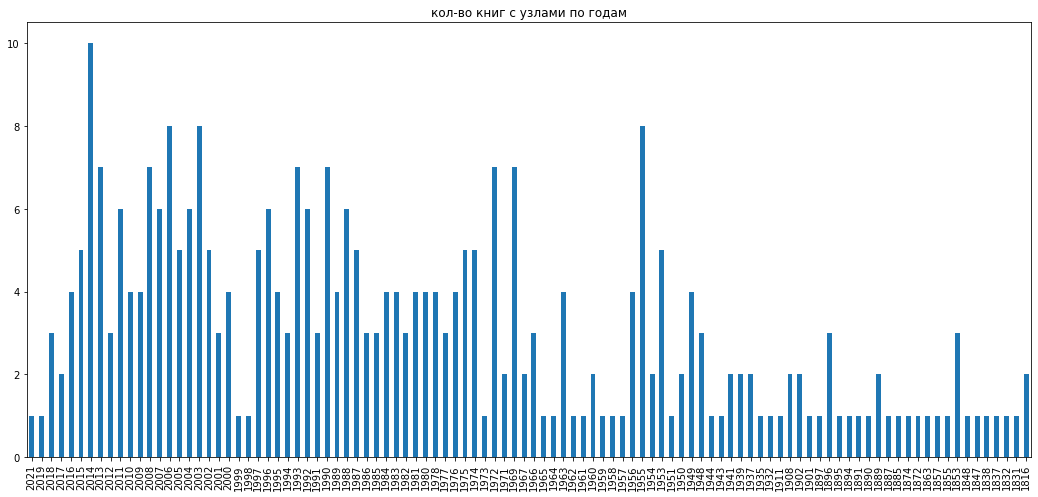

In [72]:
print('all book count', knotDfGroupedByBook.shape[0])
#кол-во книг в году (сумма узлов со всех книг в году)
series = knotDfGroupedByBook.year.value_counts()
#split into many cols
chunks = chunker(series, 10)
df = seriesToDf(chunks)
display(df)
seriesByYear = knotDfGroupedByBook.year.value_counts().sort_index(ascending=False)
seriesByYear.plot.bar(x='year', title='кол-во книг с узлами по годам', rot=90, figsize=(18,8), legend=False)

#позже 2014 мало существующих книг в датасете
knotDf = knotDf.query('year < 2015')
#кол-во записей по году (сумма узлов со всех книг в году)
#knotDf.year.value_counts()

In [73]:
#кол-во незаполненных полей
knotDf.isnull().sum()
#помоему, тип книг(справочник, уч. пособие) не имеет какого-то стандарта, поэтому его тяжело заполнять,
#    единственное для чего она нужна это фильтровать "самиздат"
#тематики выдуманны, но заполненны, потому что они разделяют узлы рыболовные и макраме и .. 

knot_name        0
sourse           0
theme          161
book_type     4107
year             0
lang             0
translated      33
dtype: int64

In [74]:
#Тематики книг в датасете. show unique theme to fix dublicates
v = knotDf['theme'].astype(str).unique().tolist()
v.sort()
print(', '.join(v))
#sum(), mean(), median(), min(), max(), first(), count(), last(), std(), var(), prod()

-, 3d, nan, альпинизм, археология, война, дети, история, кожевничество, криминалистика, лес, макраме, математика, морская наука, морские узлы, орнамент, оружие, охота, подводная, рисование, рыболовство, строительство, судостроение, ткачество, туризм, философия, хирургия, худ, эзотерика, этнография, яхтинг


In [75]:
#кол-во книг в разных тематиках
knotDfGroupedByBook.theme.value_counts()

морские узлы      61
морская наука     56
этнография        24
рыболовство       16
война             13
археология        10
строительство     10
макраме           10
туризм             8
альпинизм          8
судостроение       8
история            8
математика         5
яхтинг             4
криминалистика     4
эзотерика          4
кожевничество      4
хирургия           3
-                  3
орнамент           3
подводная          2
худ                2
дети               2
оружие             2
3d                 2
мода               1
ткачество          1
охота              1
философия          1
рисование          1
лес                1
Name: theme, dtype: int64

In [76]:
#кол-во книг по языкам
knotDfGroupedByBook.lang.value_counts()
#en книги нет смысла учитывать потому что их мало

ru       307
ru,en      4
en         2
ru,fr      1
Name: lang, dtype: int64

## График кол-во русских книг о морских узлах по годам ##
    В графике не учитываются некоторые тематики: рыболовные, магические, альпинисткие, макраме потому, что у них совсем другие узлы, ктр не совпадают с морскими. Например узел "фриволите" макрамешный и встречается только в макраме книгах.

    Графики одинаковые просто распределение дат разное — в баре не равномерно

<AxesSubplot: xlabel='year'>

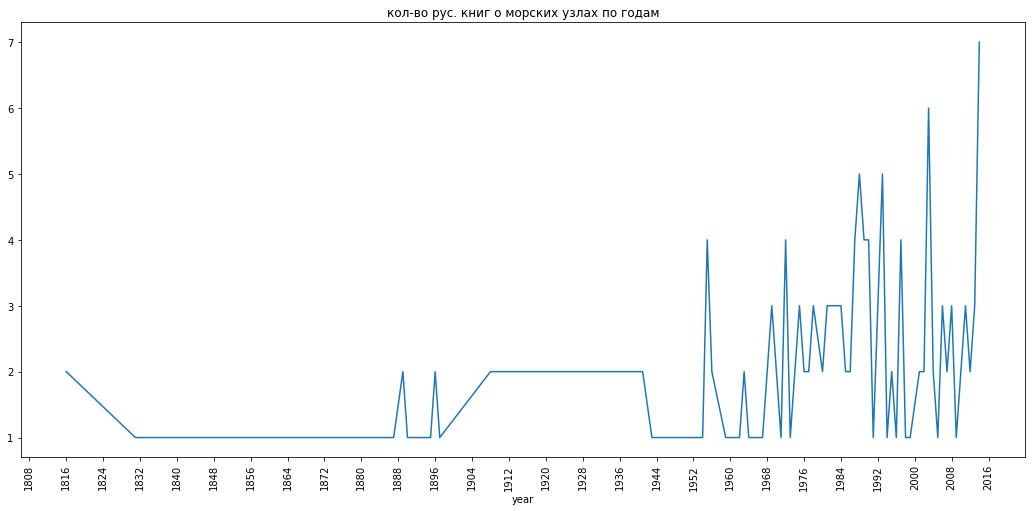

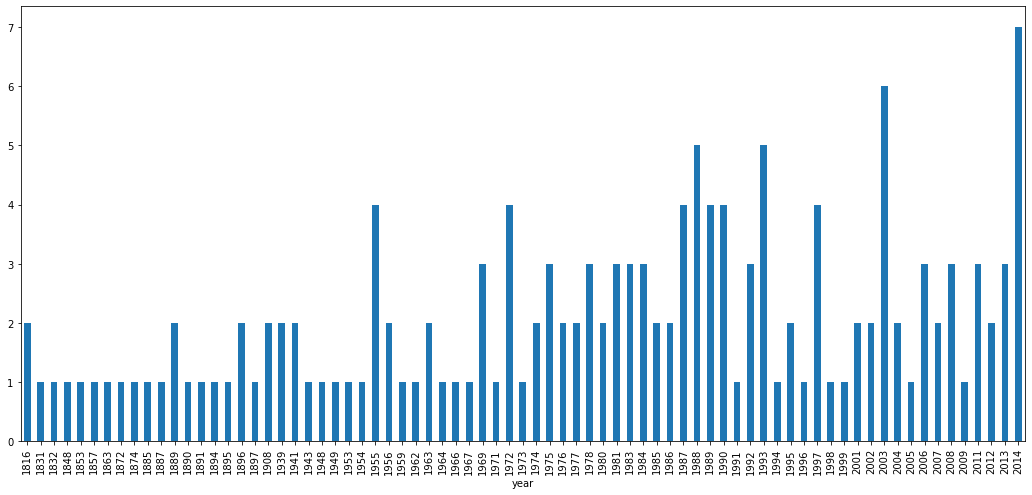

In [77]:
#filter
knotBooksDf = knotDf.query('lang!="en" & translated=="-" & book_type!="самиздат"')
seaThemesList = ['криминалистика', 'морская наука', 'морские узлы', 'строительство',
                 'подводная', 'яхтинг', 'судостроение', 'война', 'этнография']
seaThemesQuery = ' | '.join( ['theme=="{0}"'.format(i) for i in seaThemesList] )
knotBooksDf = knotBooksDf.query(seaThemesQuery)
#remove extra columns
knotBooksDf = knotBooksDf.drop(columns=['theme','book_type','translated','lang'])
#(книга, год) убраны узлы из книги
knotBooksByYear = knotBooksDf.groupby(['year','sourse']).count()
#book count in year
knotBookCntByYear = knotBooksByYear.groupby(['year']).count() 
#draw plot
knotBookCntByYear.reset_index(inplace=True)
knotBookCntByYear = knotBookCntByYear.rename(columns={'knot_name':'book_count'})
#display(knotBookCntByYear)
#print('knotBookCntByYear cols:', list(knotBookCntByYear.columns))
#в плоте распределение показа ярлыков "x" равномерно в отличие от бара
title = 'кол-во рус. книг о морских узлах по годам'
plot = knotBookCntByYear.plot(title=title,x='year', figsize=(18,8), rot=90, legend=False)
plot.xaxis.set_major_locator(plt.MaxNLocator(30)) #x label cut count
plt.draw()
knotBookCntByYear.plot.bar(x='year', y='book_count', rot=90, figsize=(18,8), legend=False) #неравномерно х

## График средн. кол-во узлов в книге по годам ##

<AxesSubplot: title={'center': 'средн. кол-во узлов в книгах по годам'}, xlabel='year'>

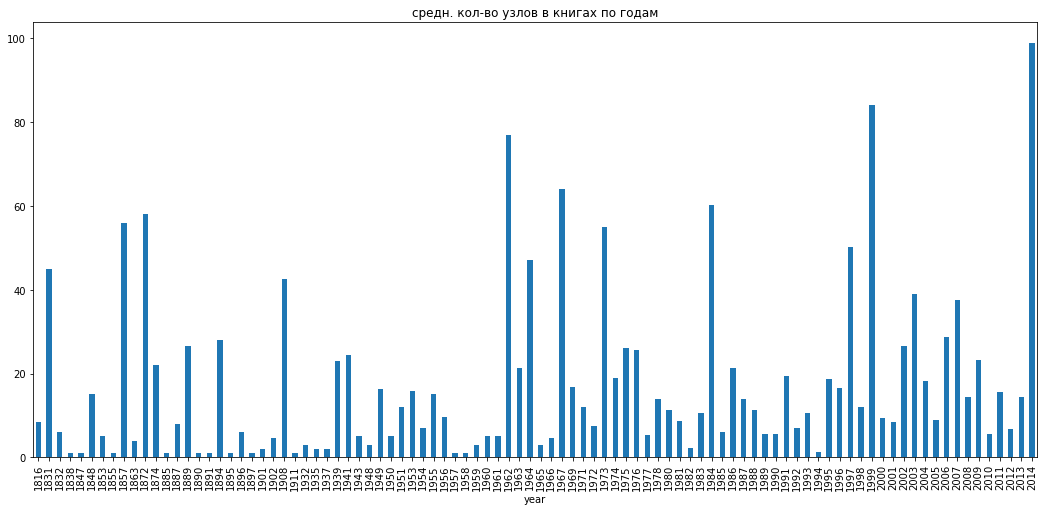

In [78]:
#filter
query = 'lang!="en" & translated=="-" & book_type!="самиздат" '
filteredData = knotDf.query(query)
filteredData = filteredData.filter(['knot_name','sourse','year'])
#display(filteredData.head())
#knot count in every book
knotcount_year_sourceData = filteredData.groupby(['sourse']).agg({
    'knot_name':'count',
    'year':'first',    
})
#display(knotcount_year_sourceData.head())
knotcount_year_sourceData.reset_index(inplace=True) #index to column after groupby
knotcount_year_sourceData = knotcount_year_sourceData.rename(columns={'knot_name':'knot_count'})
knotcount_year_sourceData = knotcount_year_sourceData.sort_values(by=['knot_count'], ascending=False )
#display(knotcount_year_sourceData.head(15))
#show table
#pd.set_option('display.max_rows', 15)
#with pd.option_context('display.max_colwidth', 50):
#    knotcount_year_sourceData = knotcount_year_sourceData.reset_index(drop=True)
#    print(knotcount_year_sourceData.head(15))
#knotcount_year_sourceData.to_csv('knot count in every book.csv', index=False, sep='|')

#knot count in year ('mean' books in same year)
knotcountMean_yearData = knotcount_year_sourceData.groupby('year').agg({
    'knot_count':'mean',
    'year':'first',    
})
#display(knotcountMean_yearData)
#knotcountMean_yearData.reset_index(drop=True, inplace=True)
title = 'средн. кол-во узлов в книгах по годам'
knotcountMean_yearData.plot.bar(x='year', title=title, rot=90, figsize=(18,8), legend=False)

#plot = filteredData.plot(title=title, x='year', figsize=(18,8), rot=90, legend=False)
#plot.xaxis.set_major_locator(plt.MaxNLocator(30)) #x label cut count
#plt.draw()

Самый часто используемый источник это Cкрягин — первое издание 1982, второе 1984.
Из-за этого создаётся впечатление, что это самый старый и первый справочник по узлам.
Так оно и есть, остальные только главы имеют про узлы

In [79]:
knotDfGroupedByBook1984 = knotDfGroupedByBook.query('year<1985 & knot_count>15 & lang!="en" & translated=="-" & book_type!="самиздат"')
display(knotDfGroupedByBook1984.sort_values(by=['knot_count','year'], ascending=False).reset_index(drop=True).head(20))

,sourse,knot_count,year,theme,book_type,lang,translated
0,Скрягин Л. Н. Морские узлы. — 2-е изд. — Москв...,148,1984,морские узлы,справочник,ru,-
1,Муравьёв Б.П. Справочник боцмана. — М.: Воениз...,91,1984,морская наука,справочник,ru,-
2,"Григорьев В. В., Грязнов В. М. Судовые такелаж...",81,1975,морские узлы,справочник,ru,-
3,Мухин Н.Г. Узлы и петли: Справочно-методическо...,80,1976,криминалистика,справочник,ru,-
4,Алексеевский Ф.Г. Такелажные работы. — 6-е изд...,77,1962,морская наука,справочник,ru,-
5,"Малахов З.С., Боровцев Ф.В., Емельянов Н.В., Г...",65,1953,морская наука,справочник,ru,-
6,Уколов Д.П. Судовой такелажник. — Ленинград: С...,64,1967,морская наука,справочник,ru,-
7,Федорович 3-й П. Морская практика для Юнгов и ...,58,1872,морская наука,справочник,ru,-
8,Черкасский М. Б. Курс морской практики для уче...,57,1908,морская наука,None,ru,-
9,Посьет К.Н. Вооружение военных судов. — 2-е из...,56,1857,война,справочник,ru,-


In [80]:
#archive
if(False):    
    #--RU source list to search in google books
    googleDf = knotDf.filter(['sourse', 'google_books', 'lang'])
    googleDf = googleDf.query('lang=="ru" & google_books.isnull()')
    googleDf = googleDf.filter(['sourse'])
    googleDf = googleDf.groupby(['sourse']).count()
    googleDf.to_csv('source.csv', index=False, sep='|')
    
    #гистограмма думает объектами - col1 bar1 col2 barl_lenght
    knotBookCntByYear.hist(column='year') #, bins=25, figsize=(12,8)